# EDA (Exploratory Data Analysis)

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# loading data
df = pd.read_csv('P2.csv')
pd.DataFrame(df)

,Indikator,Tipe
0,bagi saya suatu kesalahan merupakan salah satu...,N
1,Normalnya saya pasti sedih dan sedikit murung ...,S
2,"ketika mengalami kegagalan itu sendiri, saya m...",N
3,melihatnya sebagai kesempatan untuk belajar un...,N
4,"Kesalahan yang kecil biasanya terabaikan, namu...",S
...,...,...
97,Awalnya pasti merenung dan lama² sama berpikir...,S
98,melihatnya sebagai kesempatan untuk belajar,N
99,"Ya, dijadikan pelajaran selanjutnya agara tida...",N
100,saya cenderung suka mencari kesalahan dan meny...,S


In [ ]:
#  memeriksa missing value
df.isnull().sum()

Indikator    0
Tipe         0
dtype: int64

In [ ]:
df.describe(include=['object'])

,Indikator,Tipe
count,102,102
unique,99,2
top,melihatnya sebagai kesempatan untuk belajar un...,N
freq,3,58


In [ ]:
total = df.groupby(['Tipe']).count()
total

,Indikator
Tipe,
N,58
S,44


In [ ]:
#Mencari kata terumum pada kolom indikator
from collections import Counter

words = list(df["Indikator"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(100)

[('saya', 120),
 ('untuk', 57),
 ('dan', 55),
 ('kesalahan', 52),
 ('yang', 49),
 ('kegagalan', 39),
 ('akan', 37),
 ('tidak', 36),
 ('sebagai', 30),
 ('meningkatkan', 26),
 ('belajar', 26),
 ('hal', 24),
 ('mencari', 24),
 ('menyalahkan', 23),
 ('lebih', 23),
 ('itu', 19),
 ('dari', 19),
 ('melihat', 18),
 ('kesempatan', 17),
 ('cenderung', 17),
 ('keterampilan', 16),
 ('tersebut', 15),
 ('Saya', 14),
 ('diri', 14),
 ('gagal', 14),
 ('lagi', 13),
 ('melihatnya', 13),
 ('dengan', 12),
 ('bisa', 11),
 ('mencoba', 11),
 ('baik', 11),
 ('dalam', 11),
 ('agar', 10),
 ('kita', 10),
 ('menjadi', 10),
 ('tetapi', 9),
 ('sesuai', 9),
 ('pelajaran', 8),
 ('sebuah', 8),
 ('atau', 8),
 ('sendiri', 8),
 ('jika', 8),
 ('kembali', 7),
 ('namun', 7),
 ('adalah', 7),
 ('terus', 7),
 ('suatu', 6),
 ('karena', 6),
 ('setelah', 6),
 ('proses', 6),
 ('membuat', 6),
 ('bukan', 6),
 ('menjadikan', 6),
 ('harus', 6),
 ('mungkin', 6),
 ('tapi', 6),
 ('pasti', 5),
 ('melakukan', 5),
 ('dimana', 5),
 ('menurut'

#Data Pre-processing

1. Case Folding
2. Data Cleansing
- Case folding
- Stripping
- Remove emoji
- Remove number
- Remove character
- Remove punctiation
- Remove single char
3. Tokenizing
4. Normalization
5. Filtering
6. Stemming

In [ ]:
# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
df['Indikator'] = df['Indikator'].str.lower()
pd.DataFrame(df['Indikator'])

,Indikator
0,bagi saya suatu kesalahan merupakan salah satu...
1,normalnya saya pasti sedih dan sedikit murung ...
2,"ketika mengalami kegagalan itu sendiri, saya m..."
3,melihatnya sebagai kesempatan untuk belajar un...
4,"kesalahan yang kecil biasanya terabaikan, namu..."
...,...
97,awalnya pasti merenung dan lama² sama berpikir...
98,melihatnya sebagai kesempatan untuk belajar
99,"ya, dijadikan pelajaran selanjutnya agara tida..."
100,saya cenderung suka mencari kesalahan dan meny...


In [ ]:
# data cleansing
from IPython.utils import text
import string
import re #regex library

# Import word_tokennize & FreqDist from NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def data_clean(indikator) :
  #remove tab. new line, and back slice
  indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  #remove non ASCII (emoticon,dll)
  indikator = indikator.encode('ascii', 'replace').decode('ascii')
  #remove mention, link, hashtag
  indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
  #remove number
  indikator = re.sub(r"\d+", "", indikator)
  #remove punctuation
  indikator = indikator.translate(str.maketrans("","",string.punctuation))
  #remove whitespace leading & trailing
  indikator =  indikator.strip()
  #remove multiple white spacew into single white space
  indikator = re.sub('\s+', ' ', indikator)
  #remove single char
  indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

  return indikator
df['Indikator_clean'] = df['Indikator'].apply(data_clean)
  #NLTK word tokenize
def word_tokenize_wrapper(indikator) :
  return word_tokenize(indikator)

df['Indikator_tokens'] = df['Indikator_clean'].apply(word_tokenize_wrapper)

pd.DataFrame(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Indikator,Tipe,Indikator_clean,Indikator_tokens
0,bagi saya suatu kesalahan merupakan salah satu...,N,bagi saya suatu kesalahan merupakan salah satu...,"[bagi, saya, suatu, kesalahan, merupakan, sala..."
1,normalnya saya pasti sedih dan sedikit murung ...,S,normalnya saya pasti sedih dan sedikit murung ...,"[normalnya, saya, pasti, sedih, dan, sedikit, ..."
2,"ketika mengalami kegagalan itu sendiri, saya m...",N,ketika mengalami kegagalan itu sendiri saya me...,"[ketika, mengalami, kegagalan, itu, sendiri, s..."
3,melihatnya sebagai kesempatan untuk belajar un...,N,melihatnya sebagai kesempatan untuk belajar un...,"[melihatnya, sebagai, kesempatan, untuk, belaj..."
4,"kesalahan yang kecil biasanya terabaikan, namu...",S,kesalahan yang kecil biasanya terabaikan namun...,"[kesalahan, yang, kecil, biasanya, terabaikan,..."
...,...,...,...,...
97,awalnya pasti merenung dan lama² sama berpikir...,S,awalnya pasti merenung dan lama sama berpikir ...,"[awalnya, pasti, merenung, dan, lama, sama, be..."
98,melihatnya sebagai kesempatan untuk belajar,N,melihatnya sebagai kesempatan untuk belajar,"[melihatnya, sebagai, kesempatan, untuk, belajar]"
99,"ya, dijadikan pelajaran selanjutnya agara tida...",N,ya dijadikan pelajaran selanjutnya agara tidak...,"[ya, dijadikan, pelajaran, selanjutnya, agara,..."
100,saya cenderung suka mencari kesalahan dan meny...,S,saya cenderung suka mencari kesalahan dan meny...,"[saya, cenderung, suka, mencari, kesalahan, da..."


In [ ]:
normalizad_word = pd.read_csv("normalisasi1.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['Indikator_normalized'] = df['Indikator_tokens'].apply(normalized_term)

df['Indikator_normalized'].head()

0    [bagi, saya, suatu, kesalahan, merupakan, sala...
1    [normalnya, saya, pasti, sedih, dan, sedikit, ...
2    [ketika, mengalami, kegagalan, itu, sendiri, s...
3    [melihatnya, sebagai, kesempatan, untuk, belaj...
4    [kesalahan, yang, kecil, biasanya, terabaikan,...
Name: Indikator_normalized, dtype: object

In [ ]:
# # filtering
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')


# def stopword_removal (indikator):
#   filtering = stopwords.words('indonesian','english')
#   x = []
#   data = []
#   def my_func (x) :
#     if x in filtering :
#       return False
#     else :
#       return True

#   fit = filter(my_func,indikator)
#   for x in fit :
#     data.append(x)
#   return data

# df['indikator_filter'] = df['Indikator_normalized'].apply(stopword_removal)
# df['indikator_filter'].head()

In [ ]:
# Membuat list stopword sesuai kebutuhan fitur berdasarkan most uninformative words
'''
Ketika ada PR yang harus diselesaikan malam ini, Tiba-tiba teman lamamu mengajak
kamu untuk bertemu (reuni,bermain, ngobrol). Bagaimana cara kamu menyikapinya? , ceritakan alasannya!
'''
stop_list = ["saya","cenderung","dan","yang","akan","jika","atau","di","lalu"]

def stopword_removal (indikator):
  filtering = stop_list
  x = []
  data = []
  def my_func (x) :
    if x in filtering :
      return False
    else :
      return True

  fit = filter(my_func,indikator)
  for x in fit :
    data.append(x)
  return data

df['indikator_filter'] = df['Indikator_normalized'].apply(stopword_removal)
df['indikator_filter']

0      [bagi, suatu, kesalahan, merupakan, salah, sat...
1      [normalnya, pasti, sedih, sedikit, murung, tid...
2      [ketika, mengalami, kegagalan, itu, sendiri, m...
3      [melihatnya, sebagai, kesempatan, untuk, belaj...
4      [kesalahan, kecil, biasanya, terabaikan, namun...
                             ...                        
97     [awalnya, pasti, merenung, lama, sama, berpiki...
98     [melihatnya, sebagai, kesempatan, untuk, belajar]
99     [iya, dijadikan, pelajaran, selanjutnya, agara...
100    [suka, mencari, kesalahan, menyalahkan, hal, t...
101    [setelah, terjadi, tidak, sesuai, diinginkandi...
Name: indikator_filter, Length: 102, dtype: object

In [ ]:
# Stemming

!pip3 install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(indikator) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []
  for w in indikator :
    dt = stemmer.stem(w)
    do.append(dt)

  data_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

df['indikator_stemming'] = df['indikator_filter'].apply(stemming)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00
bagi suatu salah rupa salah satu sempat agar kita dapat tingkat terampil kita karena salah sudah jadi tidak harus ulang kembali
normal pasti sedih sedikit murung tidak mood untuk ngapain telah itu laku hal ingin laku dgn sendiri kemudian bangkit lagi untuk tingkat terampil
ketika alami gagal itu sendiri rasa sedih namun telah beberapa waktu untuk tenang diri bisa pikir jernih anggap gagal adalah hal normalsebuah proses lalu orang
lihat bagai sempat untuk ajar untuk tingkat terampil
salah kecil biasa abai namun salah besar buat pikir tentang cara baik
cari salah mana
mungkin istirahat jenak apresiasi kerja keras walau hasil kurang maksimal tetapi tetap coba dengan cara baru analis salah cara lama
salah hal tidak sesuai san telah masalah selesai ingat untuk jadi ajar alam
turut sesuatu kerja itu tidak seperti ekspetasi bisa bilang itu buah gagal salah dari salah sebut bisa ajar untuk tingkat terampil
lihat 

In [ ]:
#tokenize data stemming

 #NLTK word tokenize
def stemmed_tokenizing(indikator) :
  return word_tokenize(indikator)

df['indikator_stemmed_tokens'] = df['indikator_stemming'].apply(stemmed_tokenizing)


In [ ]:
pd.DataFrame(df[['Indikator_normalized', 'indikator_filter', 'indikator_stemmed_tokens']])

,Indikator_normalized,indikator_filter,indikator_stemmed_tokens
0,"[bagi, saya, suatu, kesalahan, merupakan, sala...","[bagi, suatu, kesalahan, merupakan, salah, sat...","[bagi, suatu, salah, rupa, salah, satu, sempat..."
1,"[normalnya, saya, pasti, sedih, dan, sedikit, ...","[normalnya, pasti, sedih, sedikit, murung, tid...","[normal, pasti, sedih, sedikit, murung, tidak,..."
2,"[ketika, mengalami, kegagalan, itu, sendiri, s...","[ketika, mengalami, kegagalan, itu, sendiri, m...","[ketika, alami, gagal, itu, sendiri, rasa, sed..."
3,"[melihatnya, sebagai, kesempatan, untuk, belaj...","[melihatnya, sebagai, kesempatan, untuk, belaj...","[lihat, bagai, sempat, untuk, ajar, untuk, tin..."
4,"[kesalahan, yang, kecil, biasanya, terabaikan,...","[kesalahan, kecil, biasanya, terabaikan, namun...","[salah, kecil, biasa, abai, namun, salah, besa..."
...,...,...,...
97,"[awalnya, pasti, merenung, dan, lama, sama, be...","[awalnya, pasti, merenung, lama, sama, berpiki...","[awal, pasti, renung, lama, sama, pikir, itu, ..."
98,"[melihatnya, sebagai, kesempatan, untuk, belajar]","[melihatnya, sebagai, kesempatan, untuk, belajar]","[lihat, bagai, sempat, untuk, ajar]"
99,"[iya, dijadikan, pelajaran, selanjutnya, agara...","[iya, dijadikan, pelajaran, selanjutnya, agara...","[iya, jadi, ajar, lanjut, agara, tidak, timbul..."
100,"[saya, cenderung, suka, mencari, kesalahan, da...","[suka, mencari, kesalahan, menyalahkan, hal, t...","[suka, cari, salah, salah, hal, tidak, sesuai,..."


In [ ]:
df.head()

,Indikator,Tipe,Indikator_clean,Indikator_tokens,Indikator_normalized,indikator_filter,indikator_stemming,indikator_stemmed_tokens
0,bagi saya suatu kesalahan merupakan salah satu...,N,bagi saya suatu kesalahan merupakan salah satu...,"[bagi, saya, suatu, kesalahan, merupakan, sala...","[bagi, saya, suatu, kesalahan, merupakan, sala...","[bagi, suatu, kesalahan, merupakan, salah, sat...",bagi suatu salah rupa salah satu sempat agar k...,"[bagi, suatu, salah, rupa, salah, satu, sempat..."
1,normalnya saya pasti sedih dan sedikit murung ...,S,normalnya saya pasti sedih dan sedikit murung ...,"[normalnya, saya, pasti, sedih, dan, sedikit, ...","[normalnya, saya, pasti, sedih, dan, sedikit, ...","[normalnya, pasti, sedih, sedikit, murung, tid...",normal pasti sedih sedikit murung tidak mood u...,"[normal, pasti, sedih, sedikit, murung, tidak,..."
2,"ketika mengalami kegagalan itu sendiri, saya m...",N,ketika mengalami kegagalan itu sendiri saya me...,"[ketika, mengalami, kegagalan, itu, sendiri, s...","[ketika, mengalami, kegagalan, itu, sendiri, s...","[ketika, mengalami, kegagalan, itu, sendiri, m...",ketika alami gagal itu sendiri rasa sedih namu...,"[ketika, alami, gagal, itu, sendiri, rasa, sed..."
3,melihatnya sebagai kesempatan untuk belajar un...,N,melihatnya sebagai kesempatan untuk belajar un...,"[melihatnya, sebagai, kesempatan, untuk, belaj...","[melihatnya, sebagai, kesempatan, untuk, belaj...","[melihatnya, sebagai, kesempatan, untuk, belaj...",lihat bagai sempat untuk ajar untuk tingkat te...,"[lihat, bagai, sempat, untuk, ajar, untuk, tin..."
4,"kesalahan yang kecil biasanya terabaikan, namu...",S,kesalahan yang kecil biasanya terabaikan namun...,"[kesalahan, yang, kecil, biasanya, terabaikan,...","[kesalahan, yang, kecil, biasanya, terabaikan,...","[kesalahan, kecil, biasanya, terabaikan, namun...",salah kecil biasa abai namun salah besar buat ...,"[salah, kecil, biasa, abai, namun, salah, besa..."


# Feature extraction

In [ ]:
# Feature extraction packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
data_clean = df.astype({'Tipe' : 'category'})
data_clean = df.astype({'indikator_stemmed_tokens' : 'string'})
data_clean.dtypes

Indikator                           object
Tipe                                object
Indikator_clean                     object
Indikator_tokens                    object
Indikator_normalized                object
indikator_filter                    object
indikator_stemming                  object
indikator_stemmed_tokens    string[python]
dtype: object

In [ ]:
#  memeriksa missing value
df.isnull().any()

Indikator                   False
Tipe                        False
Indikator_clean             False
Indikator_tokens            False
Indikator_normalized        False
indikator_filter            False
indikator_stemming          False
indikator_stemmed_tokens    False
dtype: bool

In [ ]:
# Missing value handling

for idx in data_clean.index:
 if(len(data_clean["indikator_stemming"][idx]) == 0):
  data_clean = data_clean.drop(index=idx)

In [ ]:
# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan pembobotan TF-IDF pada kolom "indikator"
X = tfidf_vectorizer.fit_transform(data_clean['indikator_stemmed_tokens'])


In [ ]:
len(data_clean)

102

In [ ]:
# encoding label
enc = LabelEncoder()
data_clean['type of encoding'] = enc.fit_transform(data_clean['Tipe'])

y = data_clean['type of encoding']

# Splitting Data

In [ ]:
# Splitting data package
from sklearn.model_selection import train_test_split

In [ ]:
if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

In [ ]:
pd.DataFrame(X,y)

,0
type of encoding,
0,"(0, 124)\t0.22737389065530195\n (0, 285)\t0..."
1,"(0, 140)\t0.14683618072588603\n (0, 28)\t0...."
0,"(0, 191)\t0.2371464790992557\n (0, 144)\t0...."
0,"(0, 6)\t0.28216696610625874\n (0, 23)\t0.33..."
1,"(0, 26)\t0.20277876935075473\n (0, 49)\t0.2..."
...,...
1,"(0, 118)\t0.35266751974574306\n (0, 216)\t0..."
0,"(0, 6)\t0.3894313102352044\n (0, 23)\t0.464..."
0,"(0, 130)\t0.42663802648781257\n (0, 276)\t0..."


In [ ]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12, shuffle=True)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(76, 297) (76,) (26, 297) (26,)


# Train Model & Selecting Model

In [ ]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline

accuracies = {

}

f1_scores = {

}

#Random Forest
random_forest = RandomForestClassifier()#n_estimators=100, random_state = 7)
# fit the model
random_forest.fit(X_train, y_train)
# train score
train_score = random_forest.score(X_train, y_train)
# test score
test_score = random_forest.score(X_test,y_test)
# predict
Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(random_forest, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['Random Forest'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}

# print("Accuracy: %.2f%%" % (predict_score * 100.0))

In [ ]:
random_forest.score(X_train,y_train),random_forest.score(X_test, y_test)

(1.0, 0.6538461538461539)

In [ ]:
#XG boost Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

train_score = xgb.score(X_train, y_train)
test_score = xgb.score(X_test,y_test)
Y_pred = xgb.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(xgb, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['XG Boost'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
xgb.score(X_train,y_train),xgb.score(X_test, y_test)

(1.0, 0.6153846153846154)

In [ ]:
#Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

train_score = sgd.score(X_train, y_train)
test_score = sgd.score(X_test,y_test)
Y_pred = sgd.predict(X_test)
predictions = [round(value) for value in Y_pred]

#Metric evaluation
#cv scores
cv_scores = cross_val_score(sgd, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['SGD'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}

In [ ]:
sgd.score(X_train,y_train),sgd.score(X_test, y_test)

(1.0, 0.6153846153846154)

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test,y_test)
Y_pred = logreg.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(logreg, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['Logreg'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
logreg.score(X_train,y_train),logreg.score(X_test, y_test)

(0.9473684210526315, 0.7307692307692307)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test,y_test)
Y_Pred = knn.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(knn, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['KNN'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
knn.score(X_train,y_train),knn.score(X_test, y_test)

(0.8026315789473685, 0.7307692307692307)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test,y_test)
Y_pred = svm.predict(X_test)

# Metric evaluation
#cv scores
cv_scores = cross_val_score(svm, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['SVM'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
svm.score(X_train,y_train),svm.score(X_test, y_test)

(1.0, 0.7307692307692307)

In [ ]:
# Naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB().fit(X_train, y_train)

# evaluate score
train_score = mnb.score(X_train, y_train)

test_score = mnb.score(X_test,y_test)

Y_pred = svm.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(mnb, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['MNB'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
mnb.score(X_train,y_train),xgb.score(X_test, y_test)

(0.9473684210526315, 0.6153846153846154)

In [ ]:
pd.DataFrame.from_dict(f1_scores, orient='index', columns=['CV f1-Scores']).sort_values(by='CV f1-Scores',ascending=False)

,CV f1-Scores
KNN,73.92
SGD,72.81
MNB,70.41
Logreg,69.74
SVM,67.54
Random Forest,66.65
XG Boost,62.57


In [ ]:
y_test.value_counts()

type of encoding
0    15
1    11
Name: count, dtype: int64

In [ ]:
pd.DataFrame(data_clean[['Tipe','type of encoding']])

,Tipe,type of encoding
0,N,0
1,S,1
2,N,0
3,N,0
4,S,1
...,...,...
97,S,1
98,N,0
99,N,0
100,S,1


# Model Improvement

In [ ]:
from sklearn.model_selection import GridSearchCV

# KNN Hyperparam tuning

In [ ]:
# define params for tuning Naive Bayes by f1 macro
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn_improve = KNeighborsClassifier()
knn_improve_gridSearch = GridSearchCV(knn_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
knn_improve_gridSearch.fit(X, y)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", knn_improve_gridSearch.best_params_)
print("Skor terbaik:", knn_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Skor terbaik: 74.38277672737561


In [ ]:
knn = KNeighborsClassifier(leaf_size=1, metric='minkowski', n_neighbors=3, p=2, weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=3)

In [ ]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [ ]:
# from sklearn.metrics as metrics import accuracy_score,precision_score, recall_score, f1_score
import sklearn.metrics as metrics

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat)*100)
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn) * 100)
print('Test set f1-score: ',metrics.f1_score(y_test, y_knn) * 100)
print('Test set precision: ',metrics.precision_score(y_test, y_knn) * 100)
print('Test set recall: ',metrics.recall_score(y_test, y_knn) * 100)

Training set accuracy:  89.17910447761194
Test set accuracy:  80.0
Test set f1-score:  84.74576271186439
Test set precision:  80.64516129032258
Test set recall:  89.28571428571429


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71        34
           1       0.81      0.89      0.85        56

    accuracy                           0.80        90
   macro avg       0.80      0.77      0.78        90
weighted avg       0.80      0.80      0.80        90



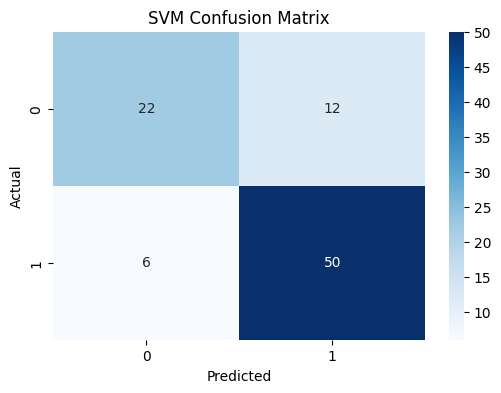

True Positives: 50
True Negatives: 22
False Positives: 6
False Negatives: 12


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_knn)

# Mendapatkan nilai True Positive, True Negative, False Positive, False Negative dari confusion matrix
TN = conf_matrix[0][0]
FP = conf_matrix[1][0]
FN = conf_matrix[0][1]
TP = conf_matrix[1][1]

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Menampilkan nilai True Positive, True Negative, False Positive, False Negative
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# NAIVE BAYES TUNING HYPERPARAM

In [ ]:
# define params for tuning Naive Bayes
parameter = {
    "alpha" : np.arange(0.0, 100.1, 0.1),
    "force_alpha" : [True,False],
    "fit_prior" : [True, False],
}

nb_improve = MultinomialNB()
nb_improve_model = GridSearchCV(nb_improve, parameter, cv=4, n_jobs=-1, verbose=1)
nb_improve_model.fit(X, y)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", nb_improve_model.best_params_)
print("Skor terbaik:", nb_improve_model.best_score_)

Fitting 4 folds for each of 4004 candidates, totalling 16016 fits
Hyperparameter terbaik: {'alpha': 1.4000000000000001, 'fit_prior': True, 'force_alpha': True}
Skor terbaik: 0.7631720430107527


In [ ]:
mnb = MultinomialNB(alpha = 0.1, force_alpha=True, fit_prior=True)
mnb.fit(X_train,y_train)

MultinomialNB(alpha=0.1, force_alpha=True)

In [ ]:
# get a prediction
y_hat = mnb.predict(X_train)
y_mnb = mnb.predict(X_test)

In [ ]:
# from sklearn.metrics as metrics import accuracy_score,precision_score, recall_score, f1_score
import sklearn.metrics as metrics

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat)*100)
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_mnb) * 100)
print('Test set f1-score: ',metrics.f1_score(y_test, y_mnb) * 100)
print('Test set precision: ',metrics.precision_score(y_test, y_mnb) * 100)
print('Test set recall: ',metrics.recall_score(y_test, y_mnb) * 100)

Training set accuracy:  92.7536231884058
Test set accuracy:  82.6086956521739
Test set f1-score:  84.00000000000001
Test set precision:  80.76923076923077
Test set recall:  87.5


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_mnb))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        44
           1       0.81      0.88      0.84        48

    accuracy                           0.83        92
   macro avg       0.83      0.82      0.82        92
weighted avg       0.83      0.83      0.83        92



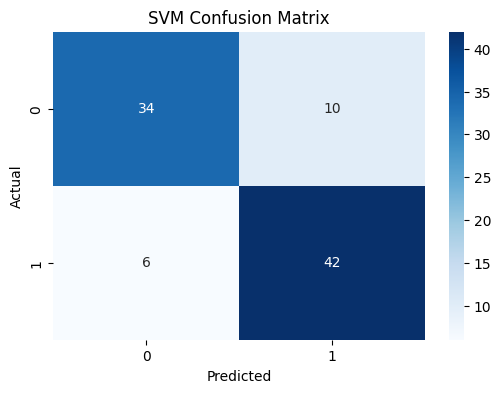

True Positives: 42
True Negatives: 34
False Positives: 6
False Negatives: 10


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_mnb)

# Mendapatkan nilai True Positive, True Negative, False Positive, False Negative dari confusion matrix
TN = conf_matrix[0][0]
FP = conf_matrix[1][0]
FN = conf_matrix[0][1]
TP = conf_matrix[1][1]

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Menampilkan nilai True Positive, True Negative, False Positive, False Negative
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

In [ ]:
mnb.fit(X_train, y_train)

Y_pred = mnb.predict(X_test)

predictions = [round(value) for value in Y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Y_pred : %.2f%%" % (accuracy * 100.0))

Y_pred : 82.61%


# KNN SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
# define params for tuning knn by f1 macro
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn_improve = KNeighborsClassifier()
knn_improve_gridSearch = GridSearchCV(knn_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
knn_improve_gridSearch.fit(X_sm, y_sm)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", knn_improve_gridSearch.best_params_)
print("Skor terbaik:", knn_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Skor terbaik: 69.34160505706556


# KNN ADS

In [ ]:
from imblearn.over_sampling import ADASYN

ads = ADASYN()

X_ads, y_ads = ads.fit_resample(X, y)

In [ ]:
# define params for tuning knn by f1 macro
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn_improve = KNeighborsClassifier()
knn_improve_gridSearch = GridSearchCV(knn_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
knn_improve_gridSearch.fit(X_ads, y_ads)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", knn_improve_gridSearch.best_params_)
print("Skor terbaik:", knn_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Skor terbaik: 66.65433507538772


# KNN TL

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

X_tl, y_tl = tl.fit_resample(X, y)

In [ ]:
# define params for tuning knn by f1 macro
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn_improve = KNeighborsClassifier()
knn_improve_gridSearch = GridSearchCV(knn_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
knn_improve_gridSearch.fit(X_tl, y_tl)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", knn_improve_gridSearch.best_params_)
print("Skor terbaik:", knn_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Skor terbaik: 71.89951197161824


# KNN RUS

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
# define params for tuning knn by f1 macro
parameter = {
    "n_neighbors" : [3,5,7],
    "weights" :['uniform', 'distance'],
    "leaf_size" : range(1,60),
    "p" : [1, 2],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn_improve = KNeighborsClassifier()
knn_improve_gridSearch = GridSearchCV(knn_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
knn_improve_gridSearch.fit(X_rus, y_rus)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", knn_improve_gridSearch.best_params_)
print("Skor terbaik:", knn_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 2124 candidates, totalling 8496 fits
Hyperparameter terbaik: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Skor terbaik: 70.05285161934778


# Predict Testing

In [ ]:
list_indikator = np.array(data_clean['indikator_stemmed_tokens'])
list_tipe = np.array(data_clean['type of encoding'])

In [ ]:
cntizer = CountVectorizer(analyzer="word",max_features=1000, min_df = 0.01)
X_cnt = cntizer.fit_transform(list_indikator)

tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

In [ ]:
# Posts in tf-idf representation
X = X_tfidf

In [ ]:
X.shape

(126, 185)

In [ ]:
'''
Dataset baru
'''
# user_input = "saya akan ikut dengannya,karna tugas bisa dikerjakan besok paginya" #P
user_input = "menolak nya, karena harus segera dikumpulkan " #J
# user_input = "Mengerjakan terlebih dahulu lalu mengabari teman bahwa saya akan menyusul " #J
# user_input = "mungkin sy akan mengerjakan tugas sebelum / setelah bertemu dgn tmn" #P
# user_input = "mengerjakan terlebih dahulu lalu baru pergi bermain " #J

my_X_cnt = cntizer.transform(np.array([user_input]))

my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
result = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

model = LogisticRegression(C = 0.001, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
# model.fit(X_train,y_train)
model.fit(X_train_sm, y_train_sm)

y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])


In [ ]:
if result == [0] :
  result_output = 'J'
else :
  result_output = 'P'

print(user_input)
print("The result is : ", result_output)



menolak nya, karena harus segera dikumpulkan 
The result is :  J


In [ ]:
y_test.value_counts()


In [ ]:
data_clean['Tipe'].value_counts()

# Saving prepro

In [ ]:
# diimport dulu terrr semua depedencies nya terr
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
# prepro depedencies
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
!pip3 install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# data cleansing
from IPython.utils import text
import string
import re #regex library
# Import word_tokennize & FreqDist from NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
# Feature extraction packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# model algorithm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# # load data
# data = pd.read_csv('P2.csv')

# # preprocessing the data -> cleanse the data & convert feature dtype as a vector/numbers yagesya biar bisa dipahami sama mesinnya brok.
# data['Indikator'] = data['Indikator'].str.lower()
# pd.DataFrame(data['Indikator'])

# def data_clean(indikator) :
#   #remove tab. new line, and back slice
#   indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
#   #remove non ASCII (emoticon,dll)
#   indikator = indikator.encode('ascii', 'replace').decode('ascii')
#   #remove mention, link, hashtag
#   indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
#   #remove number
#   indikator = re.sub(r"\d+", "", indikator)
#   #remove punctuation
#   indikator = indikator.translate(str.maketrans("","",string.punctuation))
#   #remove whitespace leading & trailing
#   indikator =  indikator.strip()
#   #remove multiple white spacew into single white space
#   indikator = re.sub('\s+', ' ', indikator)
#   #remove single char
#   indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

#   return indikator
# data['Indikator_clean'] = data['Indikator'].apply(data_clean)
#   #NLTK word tokenize
# def word_tokenize_wrapper(indikator) :
#   return word_tokenize(indikator)

# data['Indikator_tokens'] = data['Indikator_clean'].apply(word_tokenize_wrapper)

# normalizad_word = pd.read_csv("normalisasi1.csv")

# normalizad_word_dict = {}

# for index, row in normalizad_word.iterrows():
#     if row[0] not in normalizad_word_dict:
#         normalizad_word_dict[row[0]] = row[1]

# def normalized_term(document):
#     return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

# data['Indikator_normalized'] = data['Indikator_tokens'].apply(normalized_term)

# stop_list = ["saya","cenderung","dan","yang","akan","jika","atau","di","lalu"]

# def stopword_removal (indikator):
#   filtering = stop_list
#   x = []
#   data = []
#   def my_func (x) :
#     if x in filtering :
#       return False
#     else :
#       return True

#   fit = filter(my_func,indikator)
#   for x in fit :
#     data.append(x)
#   return data

# data['indikator_filter'] = data['Indikator_normalized'].apply(stopword_removal)

# # Stemming
# def stemming(indikator) :
#   factory = StemmerFactory()
#   stemmer = factory.create_stemmer()

#   do = []
#   for w in indikator :
#     dt = stemmer.stem(w)
#     do.append(dt)

#   data_clean = []
#   d_clean = " ".join(do)
#   print(d_clean)
#   return d_clean

# data['indikator_stemming'] = data['indikator_filter'].apply(stemming)

# #tokenize data stemming - NLTK word tokenize
# def stemmed_tokenizing(indikator) :
#   return word_tokenize(indikator)

# data['indikator_stemmed_tokens'] = data['indikator_stemming'].apply(stemmed_tokenizing)

# data_clean = data.astype({'Tipe' : 'category'})
# data_clean = data.astype({'indikator_stemmed_tokens' : 'string'})

# X = data_clean['indikator_stemmed_tokens']
# y = data_clean['Tipe']

# list_indikator = np.array(X)
# list_tipe = np.array(y)
# enc = LabelEncoder()
# list_tipe = enc.fit_transform(list_tipe)

# # Saving X
# !pip install joblib
# import joblib
# joblib.dump(list_indikator, 'X_P2.sav')

# # Saving y encode
# joblib.dump(list_tipe, 'y_P2.sav')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Saving prepro for testing

In [ ]:
# Load data
dt = pd.read_csv('test_P2.csv')

# casefolding
dt['Indikator'] = dt['Indikator'].str.lower()

# cleansing
def data_clean(indikator) :
  # remove tab. new line, and back slice
  indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  # remove non ASCII (emoticon,dll)
  indikator = indikator.encode('ascii', 'replace').decode('ascii')
  # remove mention, link, hashtag
  indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
  # remove number
  indikator = re.sub(r"\d+", "", indikator)
  # remove punct
  indikator = indikator.translate(str.maketrans("","",string.punctuation))
  # remove whitespace leading & trailing
  indikator = indikator.strip()
  # remove multiple white spacew into single white space
  indikator = re.sub('\s+', ' ', indikator)
  # remove single char
  indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

  return indikator

dt['Indikator'] = dt['Indikator'].apply(data_clean)

# Tokenizing
def word_tokenize_wrapper(indikator) :

  return word_tokenize(indikator)

dt['Indikator'] = dt['Indikator'].apply(word_tokenize_wrapper)

# Normalization

normalized_list = pd.read_csv('normalisasi1.csv')
normalized_dict = {}

for index, row in normalized_list.iterrows() :
  if row[0] not in normalized_dict :
    normalized_dict[row[0]] = row[1]

def normalizer(indikator) :
  return [normalized_dict[term] if term in normalized_dict else term for term in indikator]

dt['Indikator'] = dt['Indikator'].apply(normalizer)

# filtering
stop_list = ["saya","cenderung","dan","yang","akan","jika","atau","di","lalu"]

def stopword_removal (indikator):
  filtering = stop_list
  x = []
  data = []
  def my_func (x) :
    if x in filtering :
      return False
    else :
      return True

  fit = filter(my_func,indikator)
  for x in fit :
    data.append(x)
  return data

dt['Indikator'] = dt['Indikator'].apply(stopword_removal)

# Stemming
def stemming(indikator) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []
  for w in indikator :
    dt = stemmer.stem(w)
    do.append(dt)

  data_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

dt['Indikator'] = dt['Indikator'].apply(stemming)

#tokenize data stemming - NLTK word tokenize
def stemmed_tokenizing(indikator) :
  return word_tokenize(indikator)

dt['Indikator'] = dt['Indikator'].apply(stemmed_tokenizing)



sempat untuk ajar tingkat kemampuann
ang pasti awal awal rasa down tetapi tidak larut ngevaluasi apa ngebuat gagal intropeksi diri tingkat ke hal bikin gagal kemarin
ketika alami gagal salah lihat bagai sempat untuk ajar tingkat ketrampilan
gagal salah bagi itu empat untuk tingkat terampil suka menang apa salah cari cara baik
lihat gagal bagai sempat untuk ajar dengan cari sebab
dulu adalah orang salah segala hal buat gagal tetapi sekarang makin dewasa sadar semua hasil gagal itu gantung dari diri sendiri kalau kita yakin kita mampu usaha maksimal mungkin pasti ada hanya hasil anda gaagl arti itu bukan baik ada hal lebih baik datang sudah amal contoh dari kegagaln tetapi yakin hal ini pasti bukan tepat untuk telah itu dapat lebih dari pikir semua ada waktu baik
biasa lihat salah adalah hal wajar bagi manusia tetapi kalau punya salah baik susun kembalu untuk tidak ulang salah sama kalau gagal itu seperti buah motivasi untuk kembang lebih baik lagi jadi buah gagal itu untuk baut lebih ba

In [ ]:
dt.to_csv('P2_prepro.csv',index=False)

# eval

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import joblib
from imblearn.over_sampling import ADASYN

# Load data X and y
X = joblib.load('X_P2.sav')
y = joblib.load('y_P2 .sav')

# Initialize and fit CountVectorizer and TfidfTransformer
cntizer = CountVectorizer(analyzer="word", max_features=1000, min_df=0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf = tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

# Load new data for prediction
dt = pd.read_csv('P2_prepro.csv')
df_test = dt['Indikator']
label = dt['Tipe']

# Transform the new data
my_X_cnt = cntizer.transform(df_test.values.astype('U'))
my_X_tfidf = tfizer.transform(my_X_cnt).toarray()

# Initialize the result list
result = []

# Train the model
model = KNeighborsClassifier(leaf_size=1, metric='minkowski', n_neighbors=3, p=2, weights='uniform')
model.fit(X, y)
# Save the model
joblib.dump(model, 'clf_P2.sav')

# Predict the new data
y_pred = model.predict(my_X_tfidf)

# Convert predictions
for pred in y_pred:
    if pred == 0:
        result.append('N')
    else:
        result.append('S')

# Display the predictions
for i, res in enumerate(result):
    print(f"{res}")


N
S
N
S
N
N
N
N
S


In [ ]:
pd.DataFrame(label)

,Tipe
0,N
1,S
2,N
3,N
4,N
5,N
6,N
7,N
8,N


In [ ]:
pd.DataFrame(df_test)

,Indikator
0,"['sempat', 'untuk', 'ajar', 'tingkat', 'kemamp..."
1,"['ang', 'pasti', 'awal', 'awal', 'rasa', 'down..."
2,"['ketika', 'alami', 'gagal', 'salah', 'lihat',..."
3,"['gagal', 'salah', 'bagi', 'itu', 'empat', 'un..."
4,"['lihat', 'gagal', 'bagai', 'sempat', 'untuk',..."
5,"['dulu', 'adalah', 'orang', 'salah', 'segala',..."
6,"['biasa', 'lihat', 'salah', 'adalah', 'hal', '..."
7,"['lihat', 'bagai', 'sempat', 'untuk', 'ajar', ..."
8,"['bukan', 'orang', 'suka', 'salah', 'tidak', '..."


# Saving model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

X = joblib.load('X_T3.sav')
y = joblib.load('y_T3.sav')

cntizer = CountVectorizer(analyzer="word",max_features=1000, min_df = 0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

'''
Dataset Baru
'''
# user_input = "saya akan ikut dengannya,karna tugas bisa dikerjakan besok paginya" #P
user_input = "menolak nya, karena harus segera dikumpulkan " #J
# user_input = "Mengerjakan terlebih dahulu lalu mengabari teman bahwa saya akan menyusul " #J
# user_input = "mungkin sy akan mengerjakan tugas sebelum / setelah bertemu dgn tmn" #P
# user_input = "mengerjakan terlebih dahulu lalu baru pergi bermain " #J

my_X_cnt = cntizer.transform(np.array([user_input]))

my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

result = []

sm = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

model = LogisticRegression(C = 0.001, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
model.fit(X_train_sm, y_train_sm)

joblib.dump(model,'clf_T3.sav')

y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])

if result == [0] :
  result_output = 'J'
else :
  result_output = 'P'

print(user_input)
print("The result is : ", result_output)




menolak nya, karena harus segera dikumpulkan 
The result is :  J


# Load Model

In [ ]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

X = joblib.load('X_T3.sav')
y = joblib.load('y_T3.sav')

cntizer = CountVectorizer(analyzer="word",max_features=1000, min_df = 0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

'''
dataset Baru
'''
# user_input = "saya akan ikut dengannya,karna tugas bisa dikerjakan besok paginya" #P
# user_input = "menolak nya, karena harus segera dikumpulkan " #J
# user_input = "Mengerjakan terlebih dahulu lalu mengabari teman bahwa saya akan menyusul " #J
# user_input = "mungkin sy akan mengerjakan tugas sebelum / setelah bertemu dgn tmn" #P
# user_input = "mengerjakan terlebih dahulu lalu baru pergi bermain " #J
# user_input = "Saya akan mengatakan bahwasannya ingin menyelesaikan PR saya terlebih dahulu, dan akan menyusul apabila sudah selesai mengerjakannya." #J
# user_input = "Saya akan menyelesaikan terlebih dahulu tugas saya lalu menerima ajakan teman saya.. walau pertemuannya diundur beberapa jam." #J
# user_input = "Jika saya terganggu, saya akan minta maaf dan meminta waktu kepada dia agar saya bisa menyelesaikan tugas saya" #J
# user_input = "Saya akan menolaknya,karena ada tugas yang harus saya selesaikan hari itu juga" #J
# user_input = "Saya akan menolaknya dengan halus ataupun jika dia memaksa kemungkinan saya akan membawa PR saya di tempat tersebut lalu saya akan mengerjakan pr saya disana sembari mengobrol agar tidak terlalu suntuk mengerjakannya sendiri" #P

#P = 7 || N = 3

my_X_cnt = cntizer.transform(np.array([user_input]))

my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

result = []
model = joblib.load('clf_T3.sav')
y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])

if result == [0] :
  result_output = 'J'
else :
  result_output = 'P'

print(user_input)
print("The result is : ", result_output)

Saya akan menolaknya dengan halus ataupun jika dia memaksa kemungkinan saya akan membawa PR saya di tempat tersebut lalu saya akan mengerjakan pr saya disana sembari mengobrol agar tidak terlalu suntuk mengerjakannya sendiri
The result is :  J
